In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

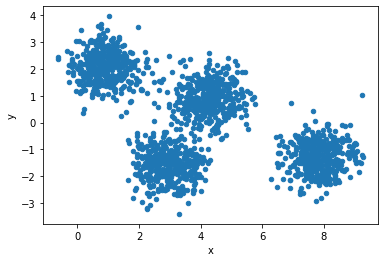

In [3]:
df_raw.plot('x','y',kind = 'scatter')

In [4]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [5]:
def mahalonabis_distance(x,mean,inv) :
    return float((x-mean).T @ inv @ (x-mean))

def multivariate_gaussian_distribution(x,mean,sigma_inv, sigma_det):
    n = len(x)
    exponential = exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
    if exponential > 1: 
        raise ValueError('Exponential Limit crossed !!')

    else :
        p = ( 1 / ((2*pi)**n * abs(sigma_det))**0.5 ) * exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
        return p 

def normalise(p_i,number_of_datapoints,number_of_clusters):
    sum_i = []
    for i in range(number_of_datapoints):
        sum_j = []
        for j in range(number_of_clusters): sum_j.append(p_i[j][i])
        sum_i.append(sum(sum_j))
    
    for i in range(number_of_datapoints):
        for j in range(number_of_clusters):
            p_i[j][i] = p_i[j][i]/sum_i[i] 
    return p_i

def has_converged(probabilities,loops) :
    tolerance = 35e-3
    max_loops = 50
    result = False
    values = maths.linalg.norm(p_i - p_i_old)
    result = maths.all(abs(probabilities - 1/number_of_clusters) < tolerance)
    if not result and loops > max_loops : 
        print('Max Loops limit exceeded still answer not reached !')
        result = True
    else : print("Loop #",str(loops).zfill(2),":",probabilities)
    
    return result

In [6]:
def initialise():
    sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
    means = maths.random.random((number_of_clusters,number_of_attributes,1))

    probabilities = ((maths.random.random(size = number_of_clusters)/10) + 1/number_of_clusters)
    probabilities = probabilities/sum(probabilities)

    

    ratio = 6/10
    width = 15
    figsize = (width, width*ratio)
    figure = graph.figure(figsize = figsize)
    graph.scatter(df_raw['x'],df_raw['y'])
    graph.scatter(means[0][0],means[0][1],c = 'red')
    graph.scatter(means[1][0],means[1][1],c = 'red')
    graph.scatter(means[2][0],means[2][1],c = 'red')
    graph.scatter(means[3][0],means[3][1],c = 'red')
    graph.title("Initial Distribution")
    graph.show()
    
    print("Loop # 00 :",probabilities)
    
    return means, sigmas, probabilities

In [7]:
def final_solution(means):
    ratio = 6/10
    width = 15
    figsize = (width, width*ratio)
    figure = graph.figure(figsize = figsize)
    graph.scatter(df_raw['x'],df_raw['y'])
    graph.scatter(means[0][0],means[0][1],c = 'red')
    graph.scatter(means[1][0],means[1][1],c = 'red')
    graph.scatter(means[2][0],means[2][1],c = 'red')
    graph.scatter(means[3][0],means[3][1],c = 'red')
    graph.title("Final Solution")
    graph.show()

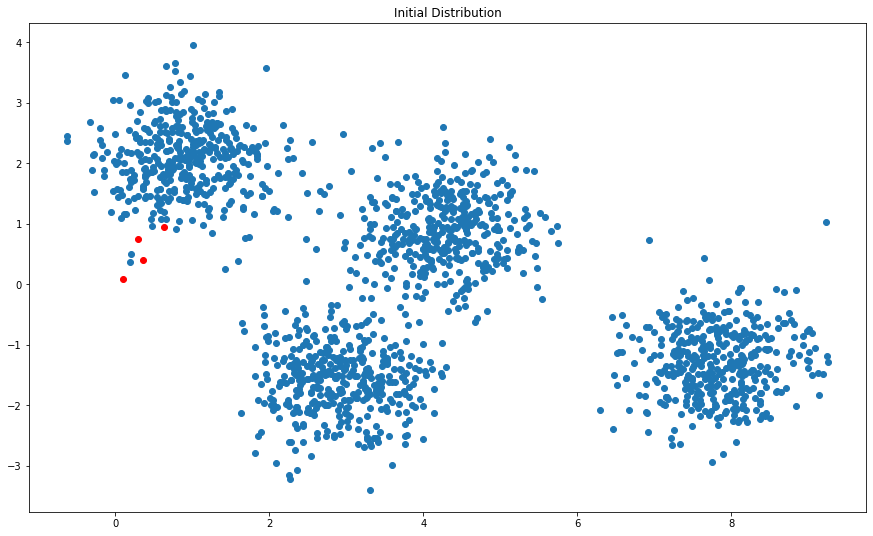

Loop # 00 : [0.23878493 0.24772618 0.25124415 0.26224475]
Loop # 01 : [0.0507631  0.86785671 0.01105099 0.0703292 ]
Loop # 02 : [0.04673792 0.84562923 0.01542057 0.09221228]
Loop # 03 : [0.04847777 0.80536987 0.02804413 0.11810822]
Loop # 04 : [0.05568852 0.76359908 0.0415398  0.13917259]
Loop # 05 : [0.07049998 0.72536972 0.04930163 0.15482866]
Loop # 06 : [0.09362724 0.68660727 0.05319943 0.16656606]
Loop # 07 : [0.12360302 0.64587276 0.05528588 0.17523834]
Loop # 08 : [0.15609327 0.60566309 0.05654146 0.18170219]
Loop # 09 : [0.18602874 0.56987632 0.05740795 0.18668699]
Loop # 10 : [0.21105733 0.54081449 0.05808797 0.19004021]
Loop # 11 : [0.22905433 0.520978   0.05872641 0.19124126]
Loop # 12 : [0.23891505 0.51039065 0.05920959 0.19148471]
Loop # 13 : [0.2433045  0.50569904 0.05955524 0.19144122]
Loop # 14 : [0.24511264 0.50373069 0.059858   0.19129867]
Loop # 15 : [0.2458322  0.50288958 0.06016047 0.19111775]
Loop # 16 : [0.24609521 0.50252014 0.06047406 0.1909106 ]
Loop # 17 : [0

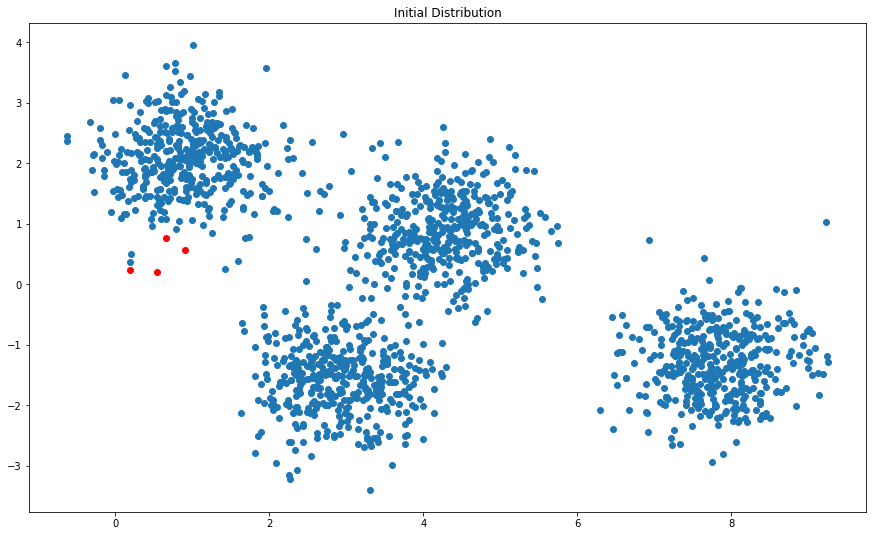

Loop # 00 : [0.23987097 0.24472164 0.25129267 0.26411472]
Loop # 01 : [0.72495686 0.03325471 0.2372035  0.00458492]
Loop # 02 : [0.70511249 0.03984023 0.2489683  0.00607897]
Loop # 03 : [0.67272726 0.05521381 0.26479658 0.00726236]
Loop # 04 : [0.64066658 0.0751336  0.27604732 0.00815251]
Loop # 05 : [0.60830482 0.09586404 0.28672029 0.00911085]
Loop # 06 : [0.57683287 0.11518455 0.29779118 0.0101914 ]
Loop # 07 : [0.54868656 0.13356996 0.3062527  0.01149078]
Loop # 08 : [0.52649925 0.15141094 0.30868054 0.01340927]
Loop # 09 : [0.51180555 0.16832629 0.30248696 0.0173812 ]
Loop # 10 : [0.50376447 0.18341174 0.28589525 0.02692854]
Loop # 11 : [0.50039823 0.19644762 0.25948236 0.0436718 ]
Loop # 12 : [0.49961842 0.20768457 0.22765387 0.06504314]
Loop # 13 : [0.49989568 0.21717973 0.19730587 0.08561873]
Loop # 14 : [0.50043035 0.22492127 0.17327423 0.10137415]
Loop # 15 : [0.50088964 0.23108107 0.15601854 0.11201075]
Loop # 16 : [0.50117922 0.2359094  0.14405461 0.11885677]
Loop # 17 : [0

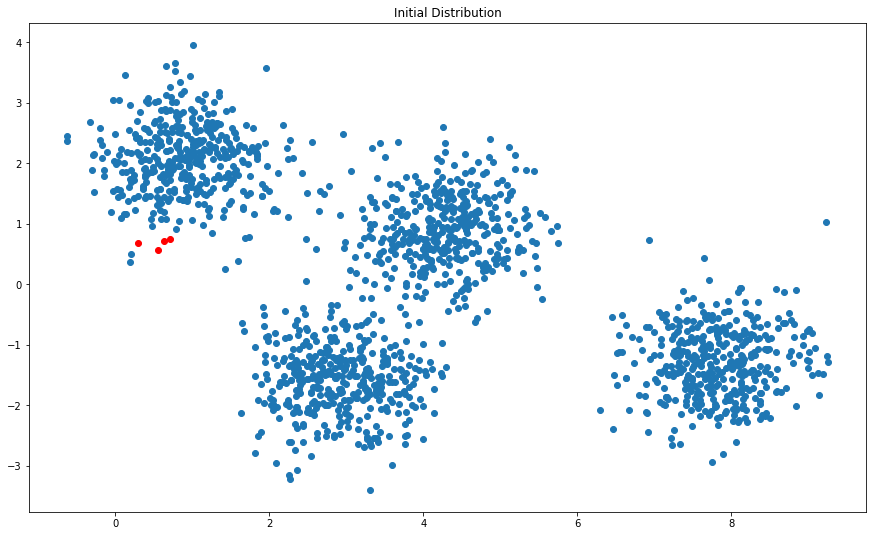

Loop # 00 : [0.25397033 0.22260475 0.28850772 0.2349172 ]
Loop # 01 : [0.08785009 0.07936202 0.77079288 0.06199501]
Loop # 02 : [0.06275107 0.06292293 0.79091334 0.08341265]
Loop # 03 : [0.0516478  0.06432015 0.75056757 0.13346448]
Loop # 04 : [0.04626969 0.07699377 0.691881   0.18485553]
Loop # 05 : [0.0488809  0.09229709 0.64320699 0.21561502]
Loop # 06 : [0.05733379 0.10742437 0.60188423 0.23335761]
Loop # 07 : [0.06659351 0.12280922 0.56788683 0.24271044]
Loop # 08 : [0.07365848 0.13806485 0.54145872 0.24681795]
Loop # 09 : [0.07818838 0.15043147 0.52311991 0.24826024]
Loop # 10 : [0.08041916 0.15818376 0.51261158 0.2487855 ]
Loop # 11 : [0.08118336 0.1622884  0.50756942 0.24895881]
Loop # 12 : [0.08123041 0.1644538  0.50529248 0.24902331]
Loop # 13 : [0.08095194 0.16576352 0.50422331 0.24906123]
Loop # 14 : [0.08052806 0.16670779 0.5036763  0.24908785]
Loop # 15 : [0.08003865 0.16749033 0.50336695 0.24910407]
Loop # 16 : [0.07951834 0.1681977  0.50317423 0.24910973]
Loop # 17 : [0

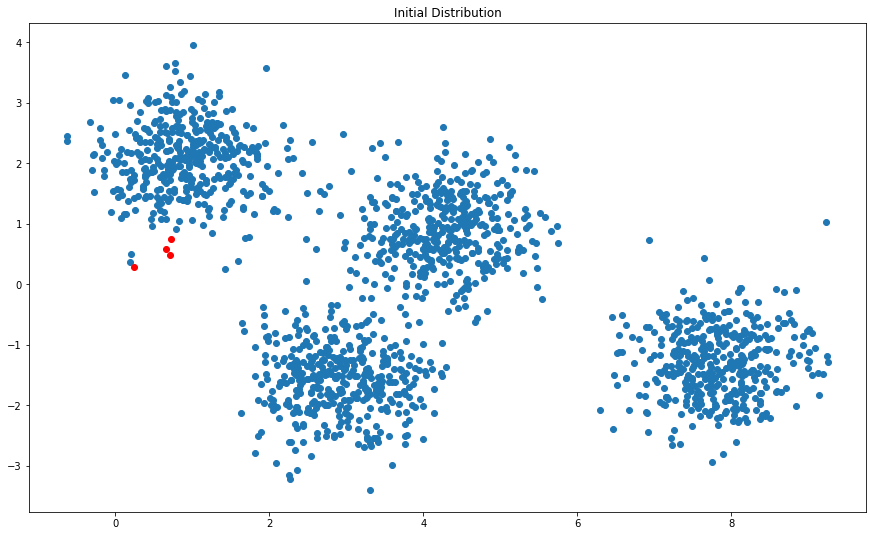

Loop # 00 : [0.26818732 0.26224952 0.23820141 0.23136175]
Loop # 01 : [0.14240784 0.65625949 0.06542982 0.13590285]
Loop # 02 : [0.14395391 0.5959857  0.09958803 0.16047236]
Loop # 03 : [0.14972521 0.5404554  0.13252904 0.17729035]
Loop # 04 : [0.16033818 0.48923952 0.15861669 0.19180561]
Loop # 05 : [0.173026   0.4405405  0.18134358 0.20508991]
Loop # 06 : [0.18490872 0.39499966 0.20171685 0.21837477]
Loop # 07 : [0.19291184 0.35759038 0.21662991 0.23286788]
Loop # 08 : [0.19851329 0.33081757 0.22868382 0.24198533]
Loop # 09 : [0.20763914 0.30752194 0.23873111 0.24610781]
Loop # 10 : [0.22199517 0.28416253 0.24579098 0.24805133]
Solution Reached ? (y/n)y


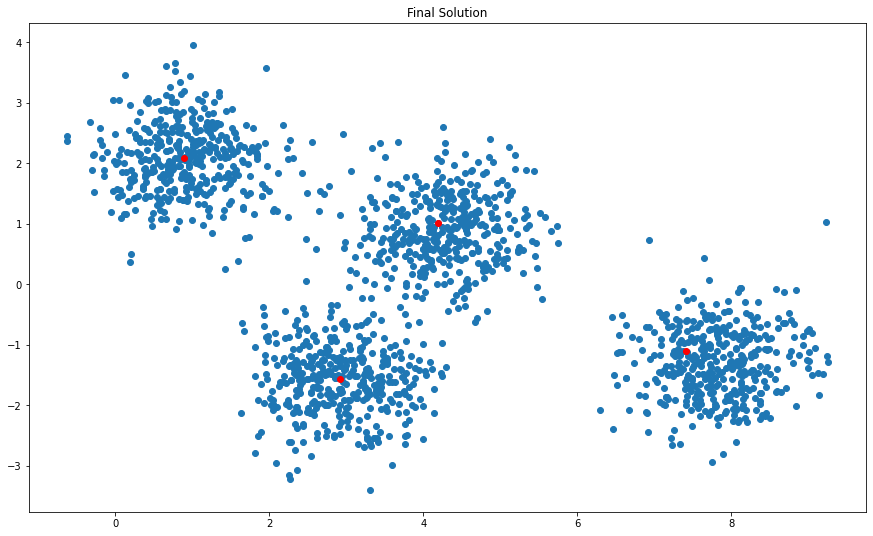

In [8]:
means, sigmas, probabilities = initialise()

converged = False
solution_reached = False
p_i_old = [1]
loops = 0
while not solution_reached :
    loops = loops + 1
    p_i = []
    for cluster in range(0,number_of_clusters) :
        p_ij = []
        for datapoint in range(0 , number_of_datapoints) :
            x = maths.array(df_raw.iloc[datapoint]).reshape(-1,1)
            det = maths.linalg.det(sigmas[cluster])
            inv = maths.linalg.inv(sigmas[cluster])
            p_ij.append(probabilities[cluster] *  multivariate_gaussian_distribution(x, means[cluster], inv, det))
       
        p_i.append(maths.array(p_ij))
    p_i = maths.matrix(p_i)
    p_i = p_i / p_i.sum(axis = 0)
    

    for cluster in range(0,number_of_clusters) :
        means[cluster] = ((p_i[cluster] @ df_raw )/p_i[cluster].sum()).T
        sigma = 0
        for datapoint in range(number_of_datapoints) :
            x = maths.array(df_raw.iloc[datapoint]).reshape(-1,1)
            sigma = sigma + p_i[cluster,datapoint] * (x - means[cluster]) @ (x - means[cluster]).T
        sigmas[cluster] = sigma / (p_i[cluster].sum() - 1)
        probabilities[cluster] = p_i[cluster].sum()/number_of_datapoints
        

    
    converged = has_converged(probabilities, loops)
    if  converged :
        solution_reached = str(input("Solution Reached ? (y/n)")) == 'y'
        if not solution_reached:
            print("Initialising again :-(")
            means, sigmas, probabilities = initialise()
            loops = 0
        if solution_reached :
            final_solution(means)
    